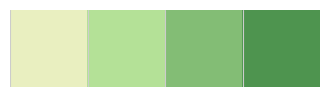

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.express import scatter
import seaborn as sns
import numpy as np


import warnings
warnings.filterwarnings('ignore')

colors_nude = ['#E9EFC0','#B4E197','#83BD75','#4E944F'] #if wandring why greens ?to reinforce the emotion (prediction dollar$)
sns.palplot(sns.color_palette(colors_nude))


# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# see this if allowed  
from sklearn.model_selection import GridSearchCV , learning_curve

In [54]:
df=pd.read_csv('Carbon Emission.csv')

In [55]:
print("The shape of our dataset is ",df.shape)
print()
print()
print("The column names and unique values in each column of the dataset are :",)
print()

print(df.nunique())


The shape of our dataset is  (10000, 20)


The column names and unique values in each column of the dataset are :

Body Type                           4
Sex                                 2
Diet                                4
How Often Shower                    4
Heating Energy Source               4
Transport                           3
Vehicle Type                        5
Social Activity                     3
Monthly Grocery Bill              250
Frequency of Traveling by Air       4
Vehicle Monthly Distance Km      4003
Waste Bag Size                      4
Waste Bag Weekly Count              7
How Long TV PC Daily Hour          25
How Many New Clothes Monthly       51
How Long Internet Daily Hour       25
Energy efficiency                   3
Recycling                          16
Cooking_With                       16
CarbonEmission                   3509
dtype: int64


In [56]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [57]:
df.isna().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

Because the Vehcile Type column has empty entries we assume that the person does not own any vehicle 

In [58]:
df['Vehicle Type']=df['Vehicle Type'].fillna('No Vehicle')


Let us try to see a basic corelation of the initial data with each other

In [59]:
df.corr()


,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
Monthly Grocery Bill,1.000000,0.015801,0.002343,-0.010318,0.006746,0.012798,0.081587
Vehicle Monthly Distance Km,0.015801,1.000000,-0.001730,-0.003943,0.004934,-0.003497,0.594171
Waste Bag Weekly Count,0.002343,-0.001730,1.000000,-0.011640,-0.003254,-0.005335,0.159193
How Long TV PC Daily Hour,-0.010318,-0.003943,-0.011640,1.000000,0.009414,0.006804,0.012985
How Many New Clothes Monthly,0.006746,0.004934,-0.003254,0.009414,1.000000,0.006426,0.198887
How Long Internet Daily Hour,0.012798,-0.003497,-0.005335,0.006804,0.006426,1.000000,0.043878
CarbonEmission,0.081587,0.594171,0.159193,0.012985,0.198887,0.043878,1.000000


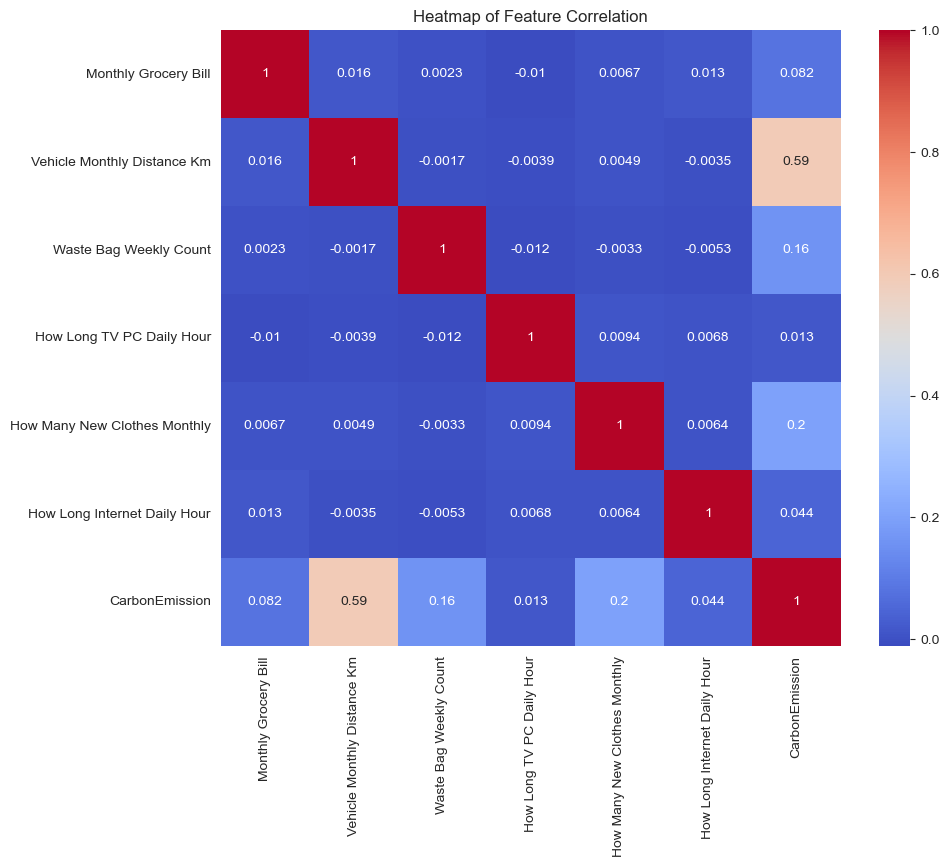

In [60]:
# Calculate correlations
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

It only shows corelation of numerical datatypes with each other
Thus we can see Monthly Distance Driven affects carbon emission a lot along with Waste Bag Weekly Count

Let us see numerical description of the data

In [61]:
df.describe()


,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


Try to write some infernce

Now we have seen the relationship of numerical data with Carbon Emission
Now let us see the relationship of categorical data

In [62]:
# we remove the numerical datatype columns
categorical_columns = list(df.columns[df.dtypes == 'object'])
# print(li)

In [63]:
# we remove  these 2 columns as they have list which contains what type of things they do
#  we will evaulate these in the end
categorical_columns.remove('Recycling')
categorical_columns.remove('Cooking_With')
print(categorical_columns)


['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency']


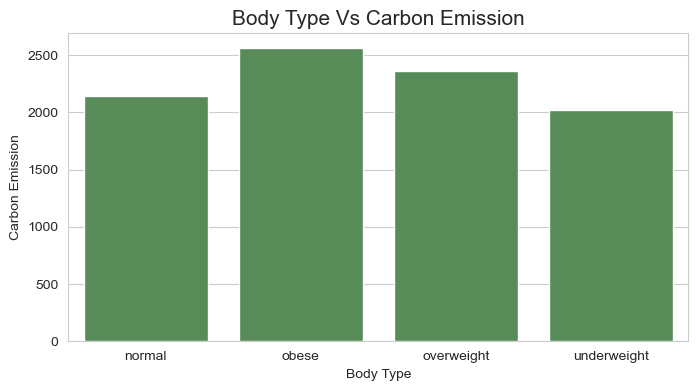

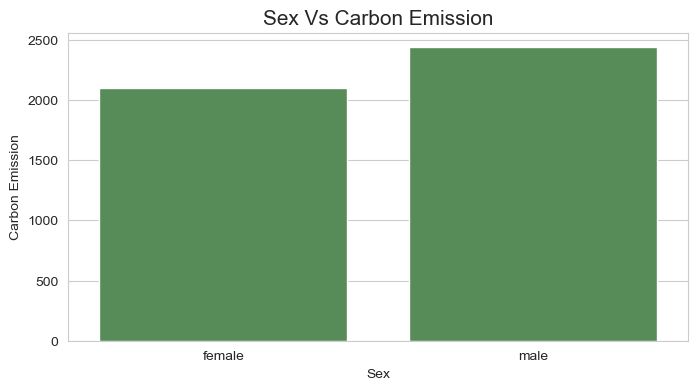

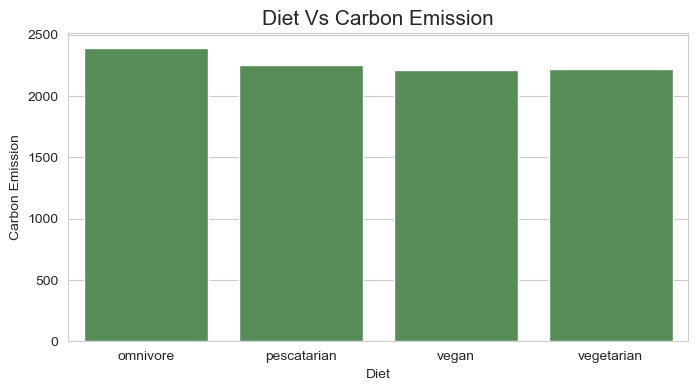

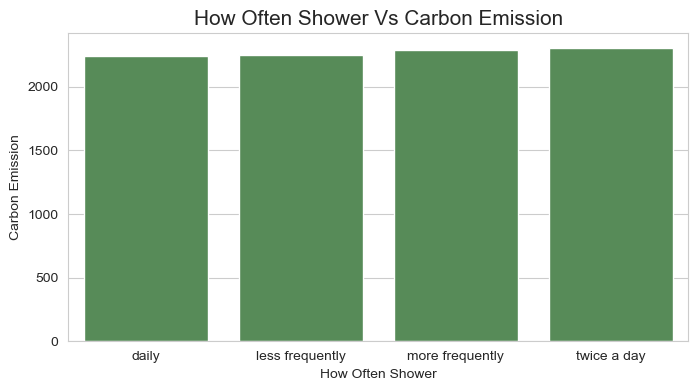

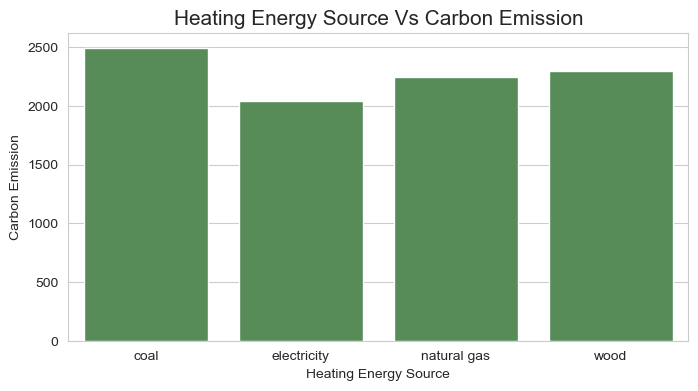

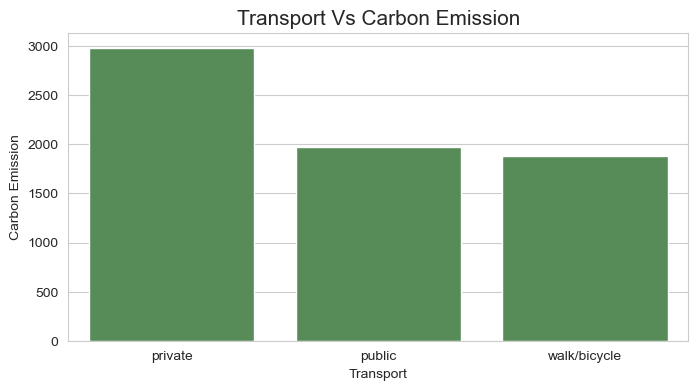

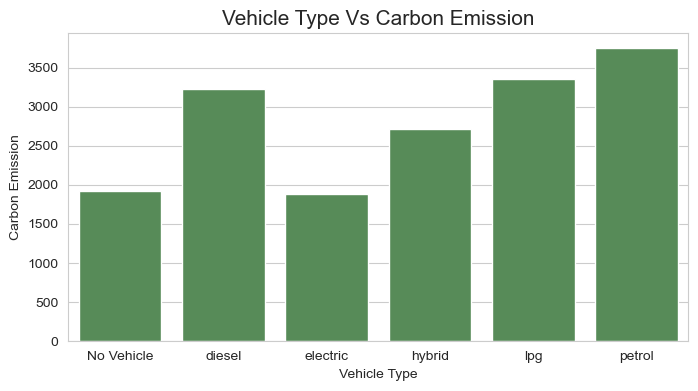

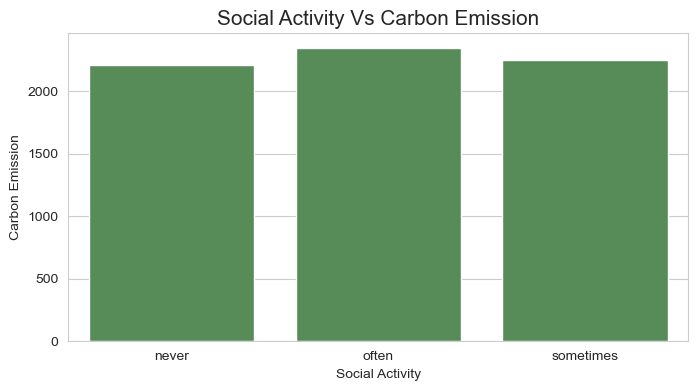

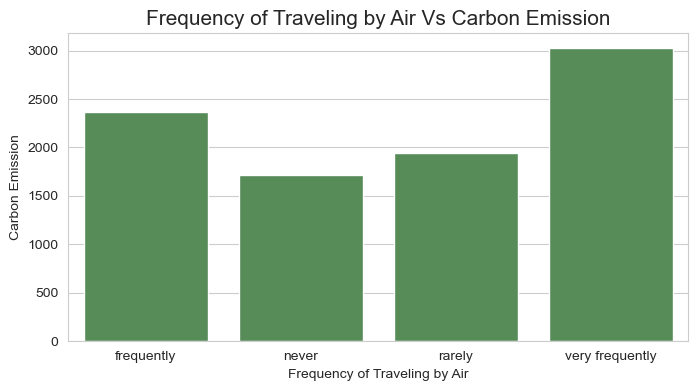

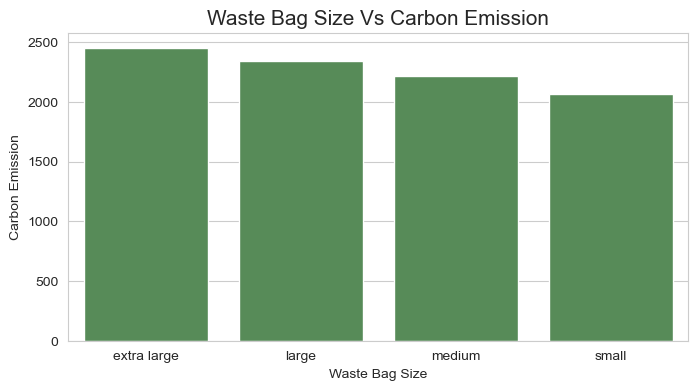

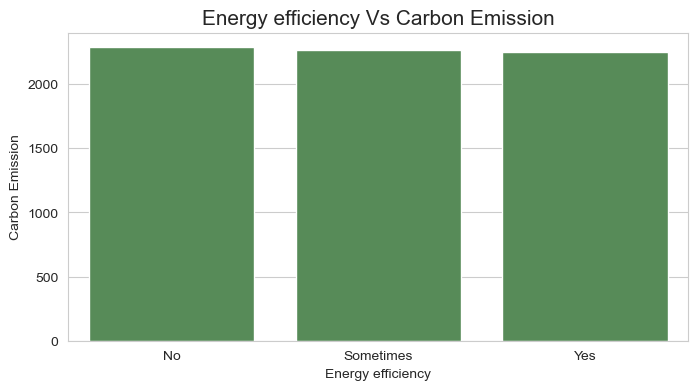

In [64]:

for categorical_column in categorical_columns:
 region_cost= df.groupby(categorical_column)['CarbonEmission'].mean() 
 fig = plt.figure(figsize=(8,4))
 sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
 plt.title(str(categorical_column)+' Vs Carbon Emission' ,size = 15)
 plt.ylabel('Carbon Emission')
 plt.show()

From the above plots we can say :

1 -> as weight of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 
    
2 -> Males generally have more carbon emission then females 
    Thus we should use a ordinal encoding to encode this feature 

3 -> as meat prefernce of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

4 -> as the freuency of shower of person increase the Carbon Emission of the person also increases slightly 
    Thus we should use a ordinal encoding to encode this feature or we may also drop this feature 

5 -> as  the person use a good source of energy the Carbon Emission of the person also decreases
    Thus we should use a ordinal encoding to encode this feature 

6 -> if person used personal vehcile to commute Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

7 -> if person uses a bad source of fuel Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

8 -> Social activity increases carbon emisison of person
    Thus we should use a ordinal encoding to encode this feature 

9 -> as frequecny of air travel of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

10 -> as waste bag size of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 


11 -> as person used more eneryg effiecnt things Carbon Emission of the person also decreases slightly
    Thus we should use a ordinal encoding to encode this feature or drop this feature

Thus we can say almost all categorcial data are ordinal and this is slef explanatory as we want the perosn to knpow the carbon emission without use heavy data points and just by simple metrices




Now Let us see relationship of the leftover 2 columns 

In [65]:
# this contains the things the people recycle
list_recycling=['Paper','Metal','Glass','Plastic']
# and the columns contain what things the perons recycle from the above 4 

# this will contain how many person recycle the product
count_recycle = np.zeros(4)

# this will contain the total carbon emission of the person with sepcifc thing to recycle 
sum_carbon=np.zeros(4)
for i in range(10000):
    for j in range(4):
        if list_recycling[j] in df['Recycling'][i]:
            count_recycle[j]=count_recycle[j]+1
            sum_carbon[j]=sum_carbon[j]+df['CarbonEmission'][i]

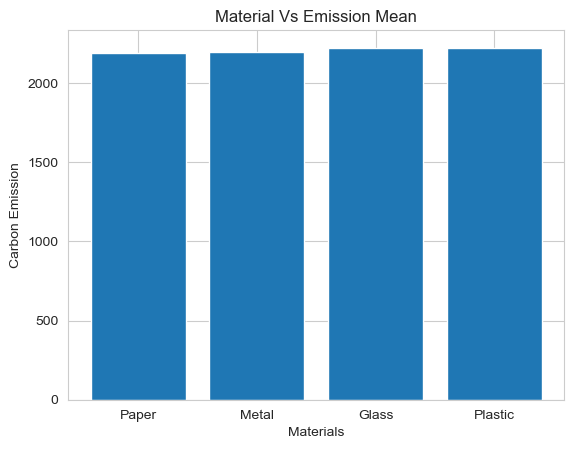

In [66]:
categories = ['Paper','Metal','Glass','Plastic']
counts = sum_carbon/count_recycle

# Create bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Materials')
plt.ylabel('Carbon Emission')
plt.title('Material Vs Emission Mean')

# Show plot
plt.show()

We can see mean carbon emission is same for all 

Thus it may not be the best idea to separate make dummies of these entires and make 0 ,1 to represnt whether the person recycle the particular item

Instead we add the total number of items person recycle and see how it goes 

In [67]:
def count_elements(string):
    # Remove the brackets and split the string by commas
    elements = string.strip("[]").split(", ")
    # Count the number of elements
    return len(elements)


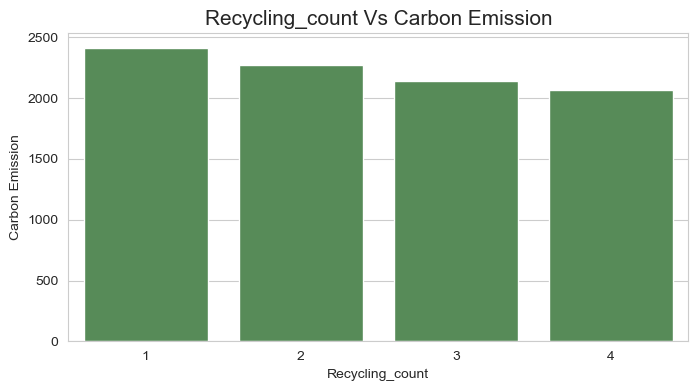

In [68]:
# as we saw that no major difference in seeing for different recycling things we see how many things the [person recycle

df['Recycling_count'] = df['Recycling'].apply(count_elements)

region_cost= df.groupby('Recycling_count')['CarbonEmission'].mean() 
fig = plt.figure(figsize=(8,4))
sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
plt.title('Recycling_count'+' Vs Carbon Emission' ,size = 15)
plt.ylabel('Carbon Emission')
plt.show()

Here it is not same for all 

it decreases monotonically as the number of products recycled by person increases

Thus it is good to use this instead of making dummies  

In [69]:
# this contains the things  people cook with
Cooking_With=['Microwave','Airfryer','Oven','Stove','Grill']
# this will contain how many items person use 
count_Cooking_With = np.zeros(5)
# this will contain the total carbon emission of the person with sepcifc thing 
sum_Cooking_With=np.zeros(5)
for i in range(10000):
    for j in range(5):
        if Cooking_With[j] in df['Cooking_With'][i]:
            count_Cooking_With[j]=count_Cooking_With[j]+1
            sum_Cooking_With[j]=sum_Cooking_With[j]+df['CarbonEmission'][i]

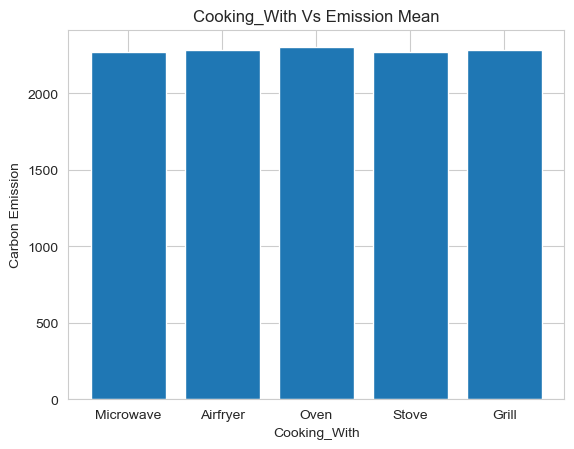

In [70]:
categories=['Microwave','Airfryer','Oven','Stove','Grill']
counts = sum_Cooking_With/count_Cooking_With

# Create bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Cooking_With')
plt.ylabel('Carbon Emission')
plt.title('Cooking_With Vs Emission Mean')

# Show plot
plt.show()

We can see mean carbon emission is same for all 

Thus it may not be the best idea to separate make dummies of these entires and make 0 ,1 to represnt whether the person used the particular item just as we saw above

Instead we add the total number of items person uses and see how it goes 

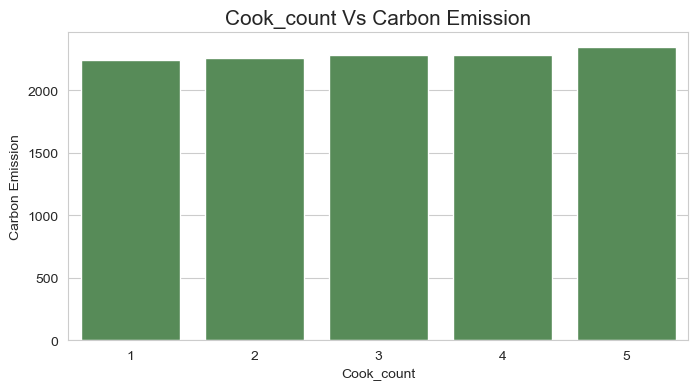

In [71]:


# as we saw that no major difference in seeing for different recycling things we see how many things the [person recycle

df['Cook_count'] = df['Cooking_With'].apply(count_elements)

region_cost= df.groupby('Cook_count')['CarbonEmission'].mean() 
fig = plt.figure(figsize=(8,4))
sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
plt.title('Cook_count'+' Vs Carbon Emission' ,size = 15)
plt.ylabel('Carbon Emission')
plt.show()


Here though it is not same for all 

it increase monotonically as the number of products used for cook increase

But difference is less

In [72]:
# the scatter plots not used 
